your task
You will practice your data cleaning skills on the main data (not the summarized version) by perfoming the following tasks:

Explore the missingness in the dataset for categorical and numerical data



Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.
Drop non-consequntial fields
Transform temporal data to their corrrect format (date time)
Perfom a full EDA and demonstrate the validity of the following assumptions
Moore's Law still holds, especially in GPUs.
Dannard Scaling is still valid in general.
CPUs have higher frequencies, but GPUs are catching up.
GPU performance doubles every 1.5 years.
GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.
High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.
Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors
TSMC makes the highest number of chips in the world
Calculate and visualized the correlation among the features
Perfom the correct encoding for your data, in readiness for modelling.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [72]:
pd.set_option('display.max_columns', None)
chip = pd.read_csv('/content/drive/MyDrive/datas/chip_dataset.csv')

In [73]:
chip.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [74]:
chip.shape

(4854, 14)

In [75]:
chip.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [76]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [77]:
missing = chip.isnull().sum().sort_values(ascending = False)

In [78]:
total_counts = chip.isnull().count()

In [79]:
percentage_missing = (missing/total_counts)*100
percentage_missing

Die Size (mm^2)          14.730119
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
Foundry                   0.000000
Freq (MHz)                0.000000
Process Size (nm)         0.185414
Product                   0.000000
Release Date              0.000000
TDP (W)                  12.896580
Transistors (million)    14.647713
Type                      0.000000
Unnamed: 0                0.000000
Vendor                    0.000000
dtype: float64

In [80]:
### we can delete the features that have more than 50% of null values
chip.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'], axis = 1, inplace = True)

In [81]:
chip.isnull().sum()

Unnamed: 0                 0
Product                    0
Type                       0
Release Date               0
Process Size (nm)          9
TDP (W)                  626
Die Size (mm^2)          715
Transistors (million)    711
Freq (MHz)                 0
Foundry                    0
Vendor                     0
dtype: int64

In [82]:
### i decide to drop the rows of the rest of the null values, so as to not interfere with the data
chip.dropna(inplace = True)

In [83]:
chip.isnull().sum()

Unnamed: 0               0
Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
Foundry                  0
Vendor                   0
dtype: int64

In [84]:
## transforming the our temporal data into datetime
chip['Release Date'] = pd.to_datetime(chip['Release Date'])

EDA 

In [85]:
#Moore's Law still holds, especially in GPUs.(that the number of transitors in (IC) doubles every 2 years)
chip['year'] = chip['Release Date'].dt.year

M_chip = chip.groupby(['year', chip['Type'].where(chip['Type'] == 'GPU')])['Transistors (million)'].mean()




In [86]:
M_chip = pd.DataFrame(M_chip)
M_chip.reset_index(inplace =True)


In [87]:
M_chip.columns

Index(['year', 'Type', 'Transistors (million)'], dtype='object')

In [88]:
fig = px.line(M_chip, x='year', y='Transistors (million)',
              title="Moore's Law: Average Transistors Over the Years(GPU)",
              labels={'year': 'Year', 'Transistors (million)': 'Average Transistors (million)'})
fig.update_xaxes(dtick =2)
fig.show()

In [89]:
# WE can proove that Moore Law is valid, as we can see that the number of transistors doubles after every 2 years.

In [94]:
# Dannard Scaling (as transistors are miniaturized power density (power per unit area) remains roughly constant,
# allowing for increased performance and reduced power consumption)
# columns to work with
 # 1. Process size = reduced size of transistors
 # 2. TDP(W) - thermal design power(which should remain relatively constant)
 # 3. Transistors -this indicates the miniaturized or scaling(proves improved performance through scaling)
 # 4. frequency - improved perfomance

D_Chip= chip[['Process Size (nm)','TDP (W)','Freq (MHz)', 'Transistors (million)','year']]
Dannard_= D_Chip.groupby('year').mean()


In [95]:
Dannard_.reset_index(inplace = True)

In [96]:
Dannard_

,year,Process Size (nm),TDP (W),Freq (MHz),Transistors (million)
0,2000.0,191.290323,39.161290,616.064516,33.129032
1,2001.0,141.600000,54.420000,1578.750000,62.410000
2,2002.0,135.531915,61.957447,1748.808511,54.893617
3,2003.0,133.555556,62.266667,1651.144444,87.700000
4,2004.0,117.904192,70.832335,1737.682635,114.928144
5,2005.0,97.991453,73.598291,1933.170940,150.717949
6,2006.0,83.559783,66.054348,1563.663043,265.967391
7,2007.0,75.319767,64.784884,1141.668605,302.255814
8,2008.0,60.619835,88.537190,1236.260331,463.752066
9,2009.0,48.712871,72.173267,1692.430693,573.727723


In [97]:
fig = px.line(Dannard_, x='year', y=['Process Size (nm)', 'TDP (W)', 'Freq (MHz)', 'Transistors (million)'])
fig.update_layout(title='Dannard Scaling', width=1200, height=1500)
fig.show()


In [99]:
## in this graph above, it does not follow up so much with dennans scaling,as we can tell from the early years, it followed up with the scalimg
# till 2005, where the theorem did not fall into place, there perhaps were issues with power leakage, heat dissipation. so we can conclude that the 
# theorem has been having challenges in the recent years

In [100]:
### CPU'S have high frequency but gpu are catching up
chips = chip.groupby(['year','Type'])['Freq (MHz)'].sum().reset_index()
fig = px.bar(chips, x= 'year', y = 'Freq (MHz)', color = 'Type', barmode = 'group', title = "Comparison of Freq on CPU and GPU")

fig.show()

In [101]:
#we can tell on the early years that the difference of frequency on CPU and GPU were quite massive, but recently, we can see on like(2015 and 2016)
#the GPU surpase the CPU, and the mergin on the recent years is quite low. so we can conclude that GPU's are catching up 

In [102]:
##GPU performance doubles every 1.5 years.

chip["Y_half"] = pd.PeriodIndex(chip['Release Date'], freq= "M")
chip.set_index('Y_half', inplace=True)
grouped_data = chip.groupby(pd.Grouper(freq='18M'))['TDP (W)'].mean().reset_index()
grouped_data

,Y_half,TDP (W)
0,2000-03,51.383333
1,2001-09,58.573770
2,2003-03,69.387850
3,2004-09,69.424870
4,2006-03,66.391635
5,2007-09,81.900302
6,2009-03,68.878873
7,2010-09,71.474273
8,2012-03,87.458128
9,2013-09,89.569892


In [103]:
grouped_data['Y_half'] = pd.to_datetime(grouped_data['Y_half'].astype(str))


In [104]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Y_half   15 non-null     datetime64[ns]
 1   TDP (W)  15 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 368.0 bytes


In [105]:
chip.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year
Y_half,,,,,,,,,,,,
2007-02,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0
2018-09,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0
2013-09,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0
2011-05,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0
2013-09,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0


In [121]:
fig = px.bar(grouped_data, x = 'Y_half', y = 'TDP (W)',title = 'GPU performance doubles every 1.5 years')
fig.show()



In [122]:
### in this figure we cannot say that truly the GPU performance doubles every 18 months

In [123]:
#GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

chip.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year
Y_half,,,,,,,,,,,,
2007-02,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0
2018-09,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0
2013-09,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0
2011-05,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0
2013-09,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0


In [124]:
Gpu_ = chip[chip['Type']== 'GPU']


In [125]:
Gpu_grouped = Gpu_.groupby(['Process Size (nm)', 'Die Size (mm^2)', 'Freq (MHz)'])
Gpu_grouped


In [126]:
Gpu_['perfomance'] = Gpu_grouped.groupby(['Process Size (nm)', 'Die Size (mm^2)', 'Freq (MHz)']).mean()

AttributeError: ignored

In [127]:
#Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

chip.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year
Y_half,,,,,,,,,,,,
2007-02,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0
2018-09,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0
2013-09,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0
2011-05,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0
2013-09,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0


In [128]:
chip['Vendor'].unique()

array(['AMD', 'Intel', 'NVIDIA', 'ATI', 'Other'], dtype=object)

In [129]:
vendor_1 = ['AMD', 'Intel', 'NVIDIA']
vendor_2 = ['ATI', 'Other']
T_vendor = chip[chip['Vendor'].isin(vendor_1)]
C_vendor = chip[chip['Vendor'].isin(vendor_2)]




In [130]:
mean_1 = T_vendor['Process Size (nm)'].mean()
mean_2 = C_vendor['Process Size (nm)'].mean()

In [131]:

# Create a DataFrame to hold the mean
mean_df = pd.DataFrame({'Vendor': ['Target Vendors', 'Comparison Vendors'],
                       'Sum of Process Size': [mean_1, mean_2]})

mean_df

,Vendor,Sum of Process Size
0,Target Vendors,48.943580
1,Comparison Vendors,90.502959


In [132]:
# Plot the mean using a bar chart
fig = px.bar(mean_df, x='Vendor', y='Sum of Process Size', color='Vendor',
             labels={'mean of Process Size': 'mean of Process Size (nm)'})
fig.update_layout(title='comparison of Process Size for Vendors')
fig.show()


In [133]:
### we can confirm that teh Process Size for Intel, AMD and Nvidia(target vendors) lies in comparatively lower range than for ATI and other vemdors(comparison vendors)

In [134]:
# TSMC makes the highest number of chips in the world
chip.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year
Y_half,,,,,,,,,,,,
2007-02,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0
2018-09,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0
2013-09,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0
2011-05,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0
2013-09,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0


In [135]:
chip['Foundry'].unique()

array(['Unknown', 'Intel', 'GF', 'TSMC', 'Samsung', 'Renesas', 'Sony',
       'NEC', 'UMC'], dtype=object)

In [136]:
px.bar(chip , x = 'Foundry', color = 'Foundry', color_continuous_scale='Rainbow')

In [137]:
## TSMC has the highest number of chips in the world followed by intel

In [138]:
#Calculate and visualized the correlation among the features
# crate a correlation that correlate to a product of GPU or CPU

chip.corr()

<ipython-input-138-319f156609b8>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),year
Unnamed: 0,1.000000,-0.142827,0.092548,0.167884,0.183700,-0.720641,0.232994
Process Size (nm),-0.142827,1.000000,-0.194653,-0.223162,-0.397745,-0.099667,-0.889776
TDP (W),0.092548,-0.194653,1.000000,0.679039,0.469702,0.063255,0.216584
Die Size (mm^2),0.167884,-0.223162,0.679039,1.000000,0.640263,-0.055344,0.279300
Transistors (million),0.183700,-0.397745,0.469702,0.640263,1.000000,-0.044115,0.562767
Freq (MHz),-0.720641,-0.099667,0.063255,-0.055344,-0.044115,1.000000,0.009415
year,0.232994,-0.889776,0.216584,0.279300,0.562767,0.009415,1.000000


<ipython-input-139-e8ae0c75c2ea>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

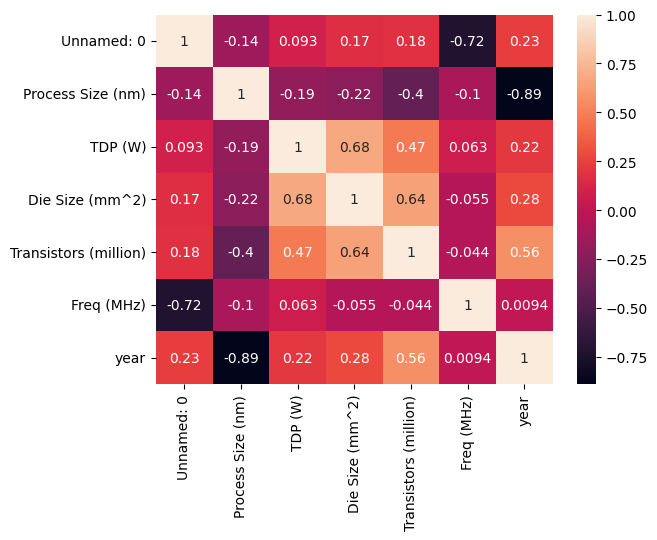

In [139]:
sns.heatmap(chip.corr(), annot = True)

In [141]:
# Perfom the correct encoding for your data, in readiness for modelling.
# fetaures that need encoding, is of Type, Foundry, Vendor
chip.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year
Y_half,,,,,,,,,,,,
2007-02,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0
2018-09,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0
2013-09,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0
2011-05,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0
2013-09,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0


In [148]:
chips = chip.drop(['Unnamed: 0','Product'], axis = 1)

In [149]:
chips.head()

,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year
Y_half,,,,,,,,,,
2007-02,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0
2018-09,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0
2013-09,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0
2011-05,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0
2013-09,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0


In [150]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 3422 entries, 2007-02 to 2010-03
Freq: M
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Type                   3422 non-null   object        
 1   Release Date           3367 non-null   datetime64[ns]
 2   Process Size (nm)      3422 non-null   float64       
 3   TDP (W)                3422 non-null   float64       
 4   Die Size (mm^2)        3422 non-null   float64       
 5   Transistors (million)  3422 non-null   float64       
 6   Freq (MHz)             3422 non-null   float64       
 7   Foundry                3422 non-null   object        
 8   Vendor                 3422 non-null   object        
 9   year                   3367 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 294.1+ KB


In [153]:
cat = chips.select_dtypes(include = 'object')

In [154]:
encoded_data = pd.get_dummies(cat)

In [159]:
encoded_chip = pd.concat([chip,encoded_data], axis = 1)

In [163]:
encoded_chip.drop(columns = ['Foundry','Vendor','Type'], axis =1, inplace= True)

In [ ]:
encoded_chip.drop()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year,Type_CPU,Type_GPU,Foundry_GF,Foundry_Intel,Foundry_NEC,Foundry_Renesas,Foundry_Samsung,Foundry_Sony,Foundry_TSMC,Foundry_UMC,Foundry_Unknown,Vendor_AMD,Vendor_ATI,Vendor_Intel,Vendor_NVIDIA,Vendor_Other
Y_half,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-02,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2018-09,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2013-09,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2011-05,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2013-09,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
